## 1. EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd
import sklearn 
from sklearn import model_selection
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
# randsom seed
seed=1234
np.random.seed(seed)

In [ ]:
num_classes=26

In [ ]:
DATA_IN_PATH = '/content/drive/My Drive/DataCollection/OSAM/'

In [ ]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file :
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
combined.csv                  6.62MB
combined_dup(-2000).csv       4.55MB
combined_clean(-2300).csv     4.51MB
combined_clean(6000)_sam.csv  3.98MB


In [ ]:
#loading csv data
all_data = pd.read_csv(DATA_IN_PATH + 'combined_clean(6000)_sam.csv', quoting = 2)
all_data.head()

,symptom,class
0,질문하겠습니다. 이어폰을 음량을 0으로 하고 끼고만 있어도 귀에 안 좋나요?,ENT
1,독감예방주사,IP
2,목에 음식물 그대로 끼어서 계속 이물감이 있습니다,ENT
3,케겔운동 궁금한것,REHM
4,등 통증 관련문의,NS


In [ ]:
# all_data의 전체 길이
len(all_data)

70249

In [ ]:
# # To finding mislabelling with errata
# what = all_data.drop_duplicates("class", keep="first")
# what

In [ ]:
# gotya = all_data[all_data["class"]=="UR"]
# gotya

In [ ]:
#stratififed split to train_data, test_data
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)

for train_idx, test_idx in split.split(all_data, all_data["class"]):
    train_data = all_data.loc[train_idx]
    test_data = all_data.loc[test_idx]

In [ ]:
print('전체 학습데이터의 개수: {}'.format(len(train_data)))
print('전체 학습데이터의 개수: {}'.format(len(test_data)))

전체 학습데이터의 개수: 56199
전체 학습데이터의 개수: 14050


In [ ]:
train_length = train_data['symptom'].astype(str).apply(len)

In [ ]:
train_length.head()

42791    28
8836     14
17507    30
26685    10
11563    32
Name: symptom, dtype: int64

Text(0, 0.5, 'Number of symptom')

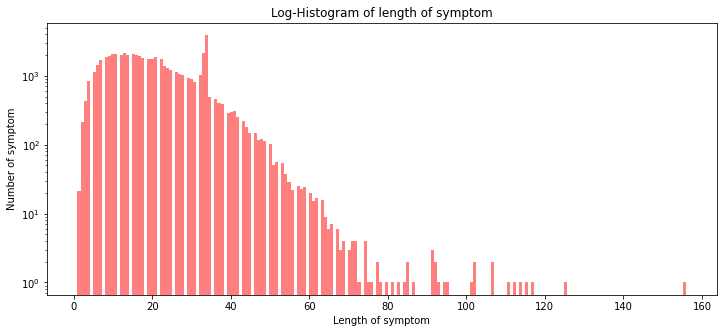

In [ ]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of symptom')
# 그래프 x 축 라벨
plt.xlabel('Length of symptom')
# 그래프 y 축 라벨
plt.ylabel('Number of symptom')

In [ ]:
print('증상 길이 최대 값: {}'.format(np.max(train_length)))
print('증상 길이 최소 값: {}'.format(np.min(train_length)))
print('증상 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('증상 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('증상 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('증상 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('증상 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

증상 길이 최대 값: 156
증상 길이 최소 값: 1
증상 길이 평균 값: 20.42
증상 길이 표준편차: 11.03
증상 길이 중간 값: 19.0
증상 길이 제 1 사분위: 12.0
증상 길이 제 3 사분위: 29.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f078374ed30>],
 'caps': [<matplotlib.lines.Line2D at 0x7f07836d8780>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f07836e2588>],
 'means': [<matplotlib.lines.Line2D at 0x7f07836e2240>],
 'medians': [<matplotlib.lines.Line2D at 0x7f07836d8e80>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f07836d8080>,
  <matplotlib.lines.Line2D at 0x7f07836d8400>]}

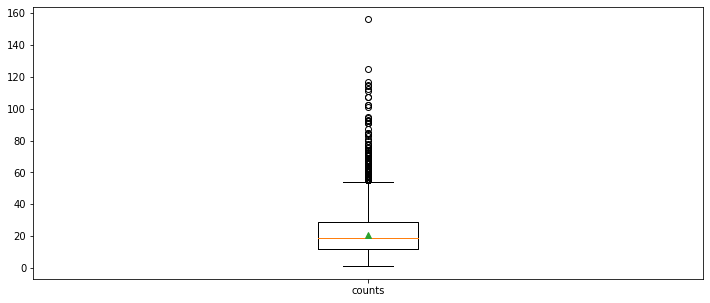

In [ ]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length,
             labels=['counts'],
             showmeans=True)

In [ ]:
# 보통은 문자열이 아닌 데이터는 삭제하나, 증상의 경우 발열, 체중 등과 같은 내용이 중요하므로 숫자도 살려둔다.
# train_review = [review for review in train_data['document'] if type(review) is str]
train_symptom = [symptom for symptom in train_data['symptom'] if type(symptom) is (str or int or float)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


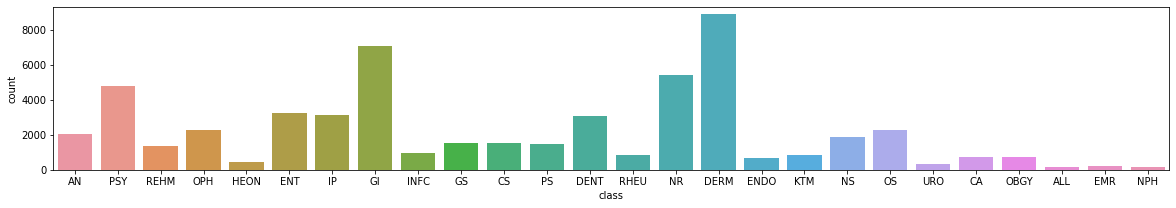

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(20, 3)
sns.countplot(train_data['class'])

In [ ]:
# DERM: 피부과 / GS: 외과 / IP: 호흡기내과 / FM: 가정의학과 / GI: 소화기내과 / OPH: 안과
# NR: 신경과 / ENT: 이비인후과 / PSY : 신경정신과 / HEON: 혈액종양내과 / RHEU: 류마티스내과
# REHM: 재활의학과 / NS: 신경외과 / AN: 마취통증의학과 / DENT: 치과 / PS: 성형외과
# RAD: 영상의학과 / CS: 흉부외과 / INFC: 감염내과 / RAON: 방사선종양학과 / OS: 정형외과 
# EMR: 응급의학과 / ENDO: 내분비내과 / CA: 순환기내과 / KTM: 한방과 / OBGY: 산부인과
# URO: 비뇨기과 / ALL: 알레르기 내과 / NPH: 신장내과 / OEM:직업환경의학과 / COAN: 대장항문외과
# LAB: 진단검사의학과 

In [ ]:
# convert class from string to integer
class_to_label = {'DERM': 0, 'GS': 1, 'IP': 2, 'GI':3, 'OPH':4,
                  'NR': 5, 'ENT': 6, 'PSY': 7, 'HEON': 8, 'RHEU': 9,
                  'REHM': 10, 'NS': 11, 'AN': 12, 'DENT': 13, 'PS': 14,
                  'CS': 15, 'INFC': 16, 'OS': 17,
                  'EMR': 18, 'ENDO': 19, 'CA': 20, 'KTM': 21, 'OBGY': 22,
                  'URO': 23, 'ALL': 24, 'NPH': 25}

train_data['label'] = train_data['class'].map(class_to_label)
test_data['label'] = test_data['class'].map(class_to_label)
train_data.head()

,symptom,class,label
42791,허리 아래쪽 부근이 뻐근하여 통증이 꽤 발생합니다.,AN,12
8836,정신건강 의학과 질문드려요,PSY,7
17507,목디스크가 있습니다. 계단 오르내리기 둘다 괜찮은가요?,REHM,10
26685,이거 비문증인가요?,OPH,4
11563,끔찍한 꿈을 자주 꾸는데 정신적으로 문제가 있는 걸까요..,PSY,7


In [ ]:
# severe imbalenced data가 확인되지만 real-world로 반영한다고 생각하고 그대로 진행한다.
# 단, FM(가정의학과)의 비중이 너무 높고 오히려 OS 비중이 낮은 것은 본 프로젝트가 군인 대상인 점을 감안하여 조정이 필요할 것 같다.
for i in range(num_classes):
  print("증상 개수: {}".format(train_data['class'].value_counts()[i]))

증상 개수: 8887
증상 개수: 7062
증상 개수: 5436
증상 개수: 4823
증상 개수: 3278
증상 개수: 3124
증상 개수: 3085
증상 개수: 2290
증상 개수: 2260
증상 개수: 2067
증상 개수: 1852
증상 개수: 1549
증상 개수: 1529
증상 개수: 1449
증상 개수: 1383
증상 개수: 946
증상 개수: 875
증상 개수: 827
증상 개수: 741
증상 개수: 738
증상 개수: 681
증상 개수: 446
증상 개수: 322
증상 개수: 230
증상 개수: 172
증상 개수: 147


In [ ]:
# 각 증상 서술의 단어 수를 확인.
# 데이터를 띄어쓰기 기준으로 나눠서 그 개수를 하나의 변수로 할당한다.
train_word_counts = train_data['symptom'].astype(str).apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of symptom')

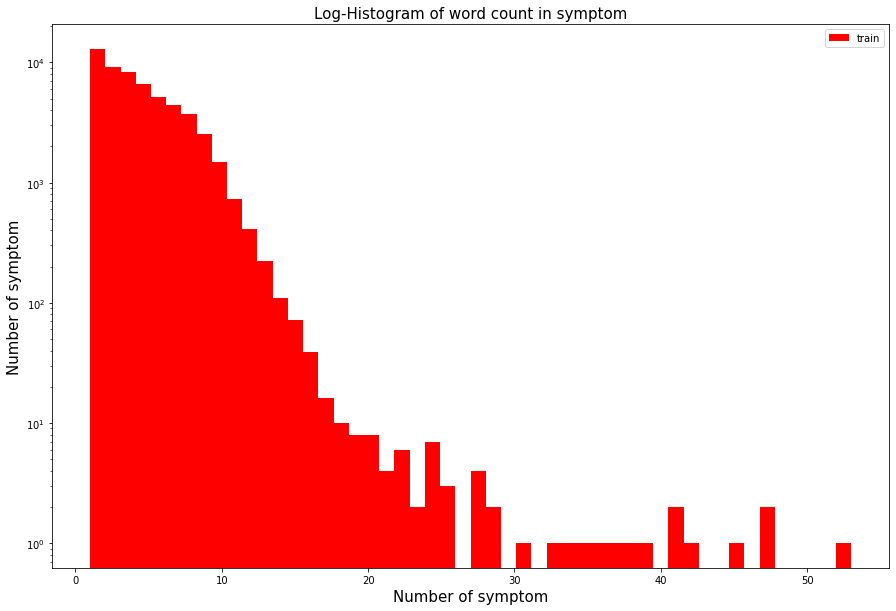

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in symptom', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of symptom', fontsize=15)
plt.ylabel('Number of symptom', fontsize=15)

In [ ]:
print('증상 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('증상 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('증상 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('증상 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('증상 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('증상 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('증상 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

증상 단어 개수 최대 값: 53
증상 단어 개수 최소 값: 1
증상 단어 개수 평균 값: 4.74
증상 단어 개수 표준편차: 2.80
증상 단어 개수 중간 값: 4.0
증상 단어 개수 제 1 사분위: 3.0
증상 단어 개수 제 3 사분위: 6.0


In [ ]:
# 특수문자 확인하기
qmarks = np.mean(train_data['symptom'].astype(str).apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['symptom'].astype(str).apply(lambda x: '.' in x)) # 마침표
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))

물음표가있는 질문: 19.31%
마침표가 있는 질문: 33.46%


## 2. FastText를 이용한 fine tuning

In [ ]:
import re
from tqdm import tqdm

import tensorflow as tf 

### Hyperparameters

In [ ]:
#random seed 고정
tf.random.set_seed(seed)

BATCH_SIZE = 32
NUM_EPOCHS = 10
# VALID_SPLIT = 0.2   ##이미 validation split을 straitified하게 시행함.
# MAX_LEN = 30 # EDA상 3사분위 수가 word수가 7이었다. token 갯수는 대략 30으로 가정해본다.
# DATA_IN_PATH = 'data_in/KOR' ## EDA 
DATA_OUT_PATH = "/content/drive/My Drive/DataCollection/OSAM"

### Tokenizers

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
train_sentence, train_label = train_data["symptom"], train_data["label"]
test_sentence, test_label = test_data["symptom"], test_data["label"]

In [ ]:
t = Tokenizer()
t.fit_on_texts(train_sentence)
# t.fit_on_texts(test_sentence)
vocab_size = len(t.word_index)+1
vocab_size

69252

In [ ]:
X_encoded = t.texts_to_sequences(train_sentence)
X_encoded

[[125, 1086, 866, 12096, 6, 2138, 1625],
 [8862, 19905, 116],
 [3499, 3, 2139, 19906, 3165, 796],
 [160, 12097],
 [19907, 826, 24, 7039, 3166, 120, 41, 182],
 [1054, 22, 11],
 [2140, 13],
 [3897, 908, 1344, 68, 156],
 [8863, 19908, 34, 3167, 19909, 395],
 [19910, 438, 2301],
 [513, 396, 417, 104],
 [19911],
 [19912, 229, 19913, 19914],
 [342, 12098, 1902, 19915, 797],
 [12099, 19916, 19917, 1301],
 [12, 19918, 19919, 1483, 161],
 [1626, 5059, 5],
 [275, 760, 19920, 528, 5873, 19921, 19922, 12100, 19923, 8864],
 [19924, 19925, 19926],
 [374, 19927, 42],
 [827, 12101, 8865, 118, 10, 101, 236],
 [24, 7040, 5874, 1704, 581, 9, 33],
 [12102, 19928, 388, 749, 8866, 110, 93, 325],
 [12103, 4401, 10, 60, 30],
 [1810, 72, 12104, 7041, 514, 19929],
 [990, 296, 222],
 [778, 361, 666, 133],
 [8867, 7042, 1556],
 [44, 69, 909, 3, 19930, 12105, 19931, 19932, 19933, 19934, 19935, 4402, 848],
 [750,
  9,
  113,
  12106,
  19936,
  3898,
  19937,
  19938,
  1124,
  19939,
  3168,
  2302,
  19940],
 [62

In [ ]:
t_X_encoded = t.texts_to_sequences(test_sentence)
t_X_encoded

[[1060, 561, 200, 21],
 [4137, 745, 47482],
 [316],
 [887],
 [757, 221, 295, 3307, 263],
 [459, 2890, 35878],
 [1380, 150, 2300, 241, 988, 383],
 [32, 70, 7487, 552, 3459],
 [3814],
 [2816, 180, 830, 37, 503, 15],
 [1091, 773, 8819, 3821],
 [17383, 18477, 5901],
 [2459, 27, 748, 9290],
 [29954],
 [6985],
 [151, 235, 255, 1565, 2186, 17, 20747],
 [1986, 647, 31528, 14211, 270, 3450, 78, 10, 311],
 [76, 340],
 [3694, 306],
 [],
 [1977, 521, 337, 665, 520],
 [],
 [53, 50, 78, 29, 323, 1841, 57],
 [1507],
 [4258, 94],
 [37762, 797],
 [40321, 806, 2, 9, 51315],
 [47, 89, 15612, 114, 986],
 [8771, 41, 329, 937, 716, 319, 859, 16, 36],
 [53, 623, 822, 3442, 33],
 [56, 4216, 4875],
 [7, 147, 353, 6761],
 [3671],
 [352, 3032],
 [6393, 27, 1, 217, 947, 22, 23],
 [946],
 [206, 52602],
 [],
 [900, 42],
 [952, 636, 1913, 55, 403, 9885, 171, 13],
 [604, 4088, 42],
 [4605, 1523, 750, 24, 2549, 10, 5613, 992],
 [1586, 149, 1778, 3373],
 [1138, 351],
 [52450, 20, 211],
 [438, 49, 37295, 3],
 [7425, 142

In [ ]:
max_len = max(len(i) for i in X_encoded)
max_len

28

In [ ]:
X_train = pad_sequences(X_encoded, maxlen=max_len, padding='post')
Y_train = np.array(train_label)
print(X_train.shape)
Y_train.shape

(56199, 28)


(56199,)

In [ ]:
X_test = pad_sequences(t_X_encoded, maxlen=max_len, padding='post')
Y_test = np.array(test_label)
print(X_test.shape)
Y_test.shape

(14050, 28)


(14050,)

### Pretrained FastText embedding for Korean

In [ ]:
!pip install fasttext

In [ ]:
import fasttext.util
fasttext.util.download_model('ko', if_exists='ignore')  # Korean
ko_model = fasttext.load_model('cc.ko.300.bin')

In [ ]:
# from gensim import models

# models.fasttext.FastText.load_fasttext_format('cc.ko.300.bin',)

In [ ]:
# To make embedding matrix
N = ko_model.get_dimension()
embedding_matrix = np.zeros((vocab_size, N))
# 단어 집합 크기의 행과 N개 열을 가지는 행렬 생성. 값은 전부 0으로 채워진다.
embedding_matrix.shape

(69252, 300)

In [ ]:
ko_model.get_words

<bound method _FastText.get_words of <fasttext.FastText._FastText object at 0x7f07537dd908>>

In [ ]:
# def get_vector(word):
#   if word in ko_model:
#     return ko_model[word]
#   else:
#     return none

In [ ]:
for word, i in t.word_index.items(): #훈련 데이터의 단어 집합에서 단어와 정수 인덱스르 1개씩 꺼내온다.
  temp = ko_model.get_word_vector(word) #단어(key) 해당되는 임베딩 벡터의 300개의 값(value)를 임시 변수에 저장
  if temp is not None:
    embedding_matrix[i] = temp


### LSTM model

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, add, concatenate
from keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D

In [ ]:
embedding_dim = 16
model = tf.keras.Sequential([
tf.keras.layers.Embedding(vocab_size, N, weights=[embedding_matrix],
              input_length=max_len, trainable=False),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
tf.keras.layers.Dense(num_classes, activation='softmax')])
# model.add(e)
# model.add(bi)
# model.add(de)
# model.add(de2)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 28, 300)           20775600  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                40576     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 26)                442       
Total params: 20,817,146
Trainable params: 41,546
Non-trainable params: 20,775,600
_________________________________________________________________


### Compile and training

In [ ]:
# 학습 준비하기
optimizer = tf.keras.optimizers.Adam(3e-4)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=[metric], experimental_run_tf_function=False)

In [ ]:
model_name = "tf2_FastText_symptom2class"



# overfitting을 막기 위한 earlystop 추가
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)\

checkpoint_path = os.path.join(DATA_OUT_PATH, model_name, 'weights.h5')
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

In [ ]:
# 학습과 eval 시작
history = model.fit(X_train, Y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_test, Y_test),
                    validation_steps=(len(Y_test)/BATCH_SIZE), 
                    callbacks=[cp_callback, earlystop_callback]) ## Cannot use in transformers of TF 2.3 -- NO. WE CAN USE THIS

#steps_for_epoch

print(history.history)

Epoch 1/10
1752/1757 [============================>.] - ETA: 0s - loss: 3.1300 - accuracy: 0.1999
Epoch 00001: val_accuracy did not improve from 0.33893
1757/1757 [==============================] - 15s 8ms/step - loss: 3.1299 - accuracy: 0.2000 - val_loss: 3.0962 - val_accuracy: 0.2308
Epoch 2/10
1753/1757 [============================>.] - ETA: 0s - loss: 3.0913 - accuracy: 0.2319
Epoch 00002: val_accuracy did not improve from 0.33893
1757/1757 [==============================] - 14s 8ms/step - loss: 3.0911 - accuracy: 0.2321 - val_loss: 3.0901 - val_accuracy: 0.2342
Epoch 3/10
1754/1757 [============================>.] - ETA: 0s - loss: 3.0866 - accuracy: 0.2359
Epoch 00003: val_accuracy did not improve from 0.33893
1757/1757 [==============================] - 14s 8ms/step - loss: 3.0867 - accuracy: 0.2359 - val_loss: 3.0890 - val_accuracy: 0.2298
Epoch 4/10
1754/1757 [============================>.] - ETA: 0s - loss: 3.0842 - accuracy: 0.2381
Epoch 00004: val_accuracy did not improve

## Testing for new sentences

In [ ]:
## To load a best weights from a saved file (.h5)  ====> for tf 2.1
# cls_model.load_weights(checkpoint_path)

## To load a model file )  ====> for tf 2.3
#new_model = tf.keras.models.load_model('my_model.h5')

In [ ]:
# exchanging key and value
label_to_class = {v:k for k,v in class_to_label.items()} 
label_to_class

{0: 'DERM',
 1: 'GS',
 2: 'IP',
 3: 'GI',
 4: 'OPH',
 5: 'NR',
 6: 'ENT',
 7: 'PSY',
 8: 'HEON',
 9: 'RHEU',
 10: 'REHM',
 11: 'NS',
 12: 'AN',
 13: 'DENT',
 14: 'PS',
 15: 'CS',
 16: 'INFC',
 17: 'OS',
 18: 'EMR',
 19: 'ENDO',
 20: 'CA',
 21: 'KTM',
 22: 'OBGY',
 23: 'URO',
 24: 'ALL',
 25: 'NPH'}

In [ ]:
def specialty_predict(new_sentence):
  new_encoded = t.texts_to_sequences(new_sentence)
  encoded = pad_sequences(new_encoded, maxlen=max_len, padding='post')
  y_output = model.predict(encoded)  

  # y_pred = y_output[0]  # The last hidden-state is the first element of the output tuple
  y_label = y_output.argmax(axis=0)
  # y_prob = y_output[y_label] 
  # y_class = label_to_class.get(y_label)  ### normalize가 필요한 것으로 생각됨. (softmax함수가 아님..)
  # loss, acc_score = model.evaluate(encoded)
  
  # if(y_prob > 0.5):
  # print("{:.2f}% 확률로 {}과를 방문하셔야합니다.\n".format(y_prob * 100, y_class))
  # else:
    # print("증상을 좀 더 자세히 적어주세요.")
  print(y_label.shape)

In [ ]:
input_sentence = "통풍으로 엄지발가락이 부었어요"
specialty_predict(input_sentence)

(26,)


In [ ]:
input_sentence = "잠이 너무 안와서 다음날 몽롱해요"
specialty_predict(input_sentence)

98.76% 확률로 PSY과를 방문하셔야합니다.



In [ ]:
input_sentence = "오래된 이명과 비염이 있어요"
specialty_predict(input_sentence)

97.27% 확률로 DERM과를 방문하셔야합니다.



In [ ]:
input_sentence = "뇌경색 이후에 어떤 운동을 하는게 좋은가요"
specialty_predict(input_sentence)

61.21% 확률로 NR과를 방문하셔야합니다.



In [ ]:
input_sentence = "항문 주변이 따가워요"
specialty_predict(input_sentence)

99.96% 확률로 GI과를 방문하셔야합니다.



In [ ]:
input_sentence = "결막염"
specialty_predict(input_sentence)

86.88% 확률로 GI과를 방문하셔야합니다.



In [ ]:
# 2000개까지 정리: val_acc = 0.6608
# 20571개까지 정리: val_acc = 0.6671

In [ ]:
 # keras 2.1의 predict나 evaluate에 문제가 있거나..아니면 데이터 부족의 문제인듯.
# 아무리 심한 Overfit이라고해도 acc 0.00은...
## 어떤 sentence를 입력해도 5번 신경과나 나옴... 어떻게 학습되냐에 따라 과가 결정되어져 버림..

#   # w_count= {}
  # # for lb in y_label:
  # #     try: w_count[lb]+= 1
  # #     except: w_count[lb]=1
  # # print(w_count)

In [ ]:
#imbalanced data... focal loss OR weighted cross entropy OR class_weight arguement in model.fit.   
## focal loss: https://3months.tistory.com/414